<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [2]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [3]:
# Your code here
from bs4 import BeautifulSoup
import requests
import pandas as pd

Download the webpage at the url


In [4]:
#your code goes here
text = requests.get(url).text

Create a soup object


In [5]:
#your code goes here
soup = BeautifulSoup(text, 'html.parser')

Scrape the `Language name` and `annual average salary`.


In [6]:
#your code goes here
content = {"languages": [], "average salary" :[]}
table = soup.find('table')
for row in table.find_all('tr'):
    cols = row.find_all('td')
    language_name = cols[1].getText()
    avg_annual_salary = cols[3].getText()
    content['languages'].append(language_name)
    content['average salary'].append(avg_annual_salary)

content['languages'].pop(0)
content['average salary'].pop(0)

'Average Annual Salary'

Save the scrapped data into a file named *popular-languages.csv*


In [11]:
# your code goes here
df = pd.DataFrame(content)
df.set_index('languages', inplace=True)
df.to_csv('popular_languages.csv')

In [25]:
# df.reset_index(inplace=True)
# df['average salary'] = df['average salary'].str.replace('$', '').str.replace(',', '').astype(int)
sorted = df.sort_values(by='average salary', ascending=False)
sorted

,languages,average salary
4,Swift,130801
0,Python,114383
5,C++,113865
3,Javascript,110981
1,Java,101013
9,Go,94082
2,R,92037
6,C#,88726
8,SQL,84793
7,PHP,84727


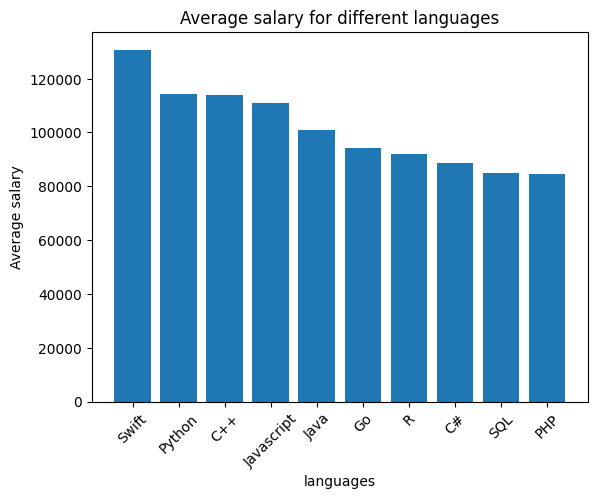

In [27]:
import matplotlib.pyplot as plt
plt.bar(sorted['languages'], sorted['average salary'])
plt.title('Average salary for different languages')
plt.xlabel('languages')
plt.ylabel('Average salary')
plt.xticks(rotation=45)
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
